### Adaline Class:

Since the Perceptron Rule and the Adaline are very similar we modified the fit method of Perceptron Algorithm.

In [ ]:
import numpy as np

class AdalineGD(object):  #Adaline Gradient Descent
    """ADAptive LInear classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_itr : int
        Passes over the training dataset -->Epochs
    
    Attributes
    ----------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of misclassification in every epoch.
    """
    
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        ----------
        X:{array-like}, shape = [n_samples, n_features]
            Training vectors.
        y: array_like, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self: object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #shape [n_samples,1]
    
    def activation(self,X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self,X):
        """Return class label after unit setup"""
        return np.where(self.net_input(X)>= 0.0,1,-1) #try np.where(self.net_input(X)>= 0.0,1,-1)
        

#### Importing the dataframe and preparing the Input (X,y) 

In [ ]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

y = df.iloc[0:100, 4].values  #an array that takes the first 100 rows and the responce (4th column)

y = np.where(y == "Iris-setosa",-1,1)

X = df.iloc[0:100, [0,2]].values #We extract the first 100 rows for the first and third column

#### Plotting the performance: function cost vs epochs

Text(0.5, 1.0, 'Adaline - Learning Rate 0.0001')

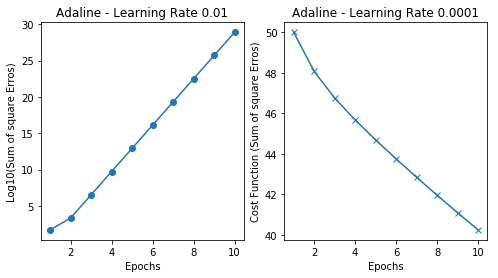

In [ ]:
import matplotlib.pyplot as plt

fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) #we setup a multiplot

ada1 = AdalineGD(n_iter=10).fit(X,y)

ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker = "o")

ax[0].set_xlabel("Epochs")

ax[0].set_ylabel("Log10(Sum of square Erros)")

ax[0].set_title("Adaline - Learning Rate 0.01")

ada2 = AdalineGD(n_iter=10, eta= 0.0001).fit(X,y)

ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker = "x")

ax[1].set_xlabel("Epochs")

ax[1].set_ylabel("Cost Function (Sum of square Erros)")

ax[1].set_title("Adaline - Learning Rate 0.0001")

Try to print the list of errors for two different object ada1 and ada2 (different learning rate):

In [ ]:
print(ada1.cost_) #we use log10(adai.cost_) because we have a list of very big numbers!!! 
print("----------")
print(ada2.cost_)

[50.0, 2230.853960255, 3475977.0425619674, 5423372722.5878315, 8461791557634.331, 1.3202470134517624e+16, 2.0599091394023023e+19, 3.2139634624124605e+22, 5.014571244981943e+25, 7.8239609955381275e+28]
----------
[50.0, 48.06916268602549, 46.75624785073664, 45.67588152905383, 44.6913293479668, 43.75388836192351, 42.84602748758452, 41.961257613784404, 41.09700496411307, 40.252087948337085]


Standardize the features and try the Adaline algorithm:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


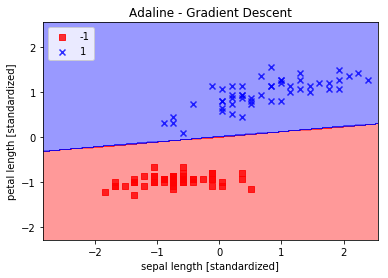

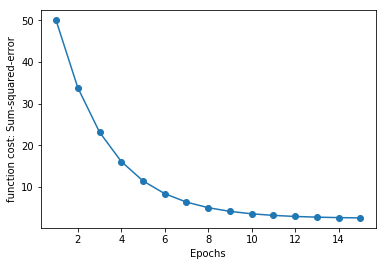

In [ ]:
import nbimporter # I use this library to import function from another file in the same working directory

import Perceptron

from matplotlib.colors import ListedColormap


X_std = np.copy(X)

X_std[:,0] = (X[:,0] - X[:,0].mean())/ X[:,0].std()

X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

ada = AdalineGD(n_iter=15)

ada.fit(X_std,y)

Perceptron.plot_decision_regions(X_std, y, classifier = ada) #import a function from Percetron file in the same working directory

plt.title("Adaline - Gradient Descent")

plt.xlabel("sepal length [standardized]")

plt.ylabel("petal length [standardized]")

plt.legend(loc="upper left")

plt.show()

plt.plot(range(1,len(ada.cost_) +1) ,ada.cost_, marker = "o")
         
plt.xlabel("Epochs")
         
plt.ylabel("function cost: Sum-squared-error")
         
plt.show()
        



In [ ]:
print(ada.cost_) #The cost function doesn't go to zero! But converge = we have minimize the error!!!

[50.0, 33.82690621665535, 23.15304865175933, 16.108556308988383, 11.459358765771782, 8.39099886925878, 6.365954253061313, 5.0294729288689775, 4.1474270146071435, 3.565297671844978, 3.1811061391532727, 2.927548857378686, 2.7602070768597784, 2.6497654783726454, 2.5768766478691654]


Check the standardized features distribution:

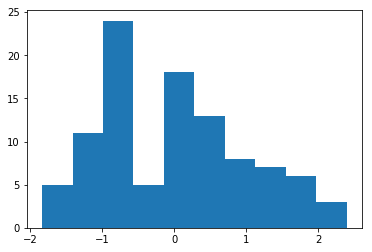

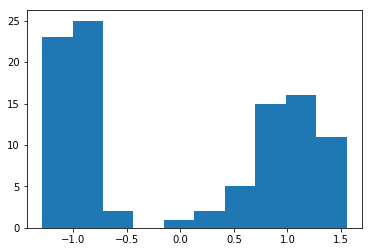

In [ ]:
plt.hist(X_std[:,0])
plt.show()

plt.hist(X_std[:,1])
plt.show()

### Stocastic Gradient Descent:

With previous method we use the whole dataset for calculating the gradient (for each epoch)

Stocastic Gradient Descent--> we calculate the gradient with only a sample (one row)

SGD converges faster than BGD(reaches the minimum value on cost function)for more frequent weights update

Why we use SGD? because if we have a big dataset with batch gradient descent could be computationally costly.

We have some modifications respect BGD:
    
- To obtain accurate results with SGD we present data in random order--> shuffle the training set for every     
  epoch to prevent cycles (???)
- The fixed learning rate is (often) replaced with by an adaptive learning rate that decrease over the time
- We can use SGD for online learning: our model is trained on-the-fly as new training data arrives.It's use
  full if we accumulate large amounts of data, ex: customer data in a typical web applications.

#### Adaline Class (modified with Stocastic Gradient Descent):

In [ ]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
       
       Parameters
       ----------
       
       eta: float
           Learning rate(between 0.0 and 1.0)
       n_iter: int
           Passes over the training dataset
           
       Attributes
       ----------
       
       w_1d-array
           Weights after fitting
       errors_ :list
           Number of misclassifications in every epoch.
       shuffle : bool (default: True)
           Shuffle training data every epoch
           to try to prevent cycles.
       random_state: int(default: None)
           Set random state for shuffling
           and initializing the weights.
           
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_= []
        for i in range(self.n_iter):
            if self.shuffle:
                X ,y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y) #check sum(cost)/len(cost)-->should be the same!!!
            self.cost_.append(avg_cost)
            
        return self
    
    def partial_fit(self,X,y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] >1: #why we can't try y.shape[0], y =[100,] and ravel() transform an array in 1-d array
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        """Shuffle Training data"""
        r = np.random.permutation(len(y)) # np.random.permutation(10) = array(3,4,6,2,1,5,7,8,9,0)
        return X[r],y[r]
    
    def _initialize_weights(self,m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1+m)
        self.w_initialized = False
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta*xi.dot(error)
        self.w_[0] += self.eta*error
        cost = 0.5*error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X)>= 0.0,1,-1)

#### Plot AdalineSGD (on IRIS dataset):

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


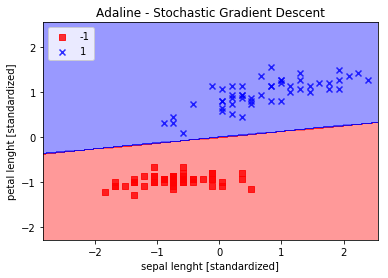

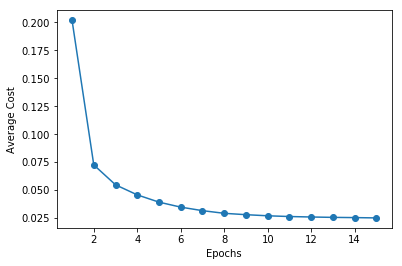

In [ ]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X_std,y)
Perceptron.plot_decision_regions(X_std, y, classifier = ada)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("sepal lenght [standardized]")
plt.ylabel("petal lenght [standardized]")
plt.legend(loc = "upper left")
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker ="o")
plt.xlabel("Epochs")
plt.ylabel("Average Cost")
plt.show()